# Earthquake & Tsunami Risk Assesment

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

print("ML Notebook Loaded | Setup Complete")

ML Notebook Loaded | Setup Complete


In [ ]:
et_data = pd.read_csv('../data/earthquake_data_tsunami.csv')

display(et_data.head())
print("\n")
print("-" * 40)
display(et_data.info())
print("\n")
print("-" * 40)
display(et_data.describe())
print("\n")
print("-" * 40)
display(et_data.isnull().sum())
print("\n")
print("-" * 40)

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


None

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

### **Feauture Engineering**

In [3]:
et_data['energy'] = et_data['magnitude'] ** 2
et_data['felt_vs_measured'] = et_data['mmi'] - et_data['cdi']
et_data['dmin_km'] = et_data['dmin'] * 111
et_data['proximity_score'] = 1 / (et_data['dmin_km'] + 1)
et_data['gap_norm'] = et_data['gap'] / 360
et_data['depth_category'] = pd.cut(et_data['depth'], bins=[0, 70, 300, 700],
                              labels=['shallow', 'intermediate', 'deep'])
et_data['season'] = et_data['Month'] % 12 // 3 + 1 

et_data = pd.get_dummies(et_data, columns=['depth_category', 'season'], drop_first=True)


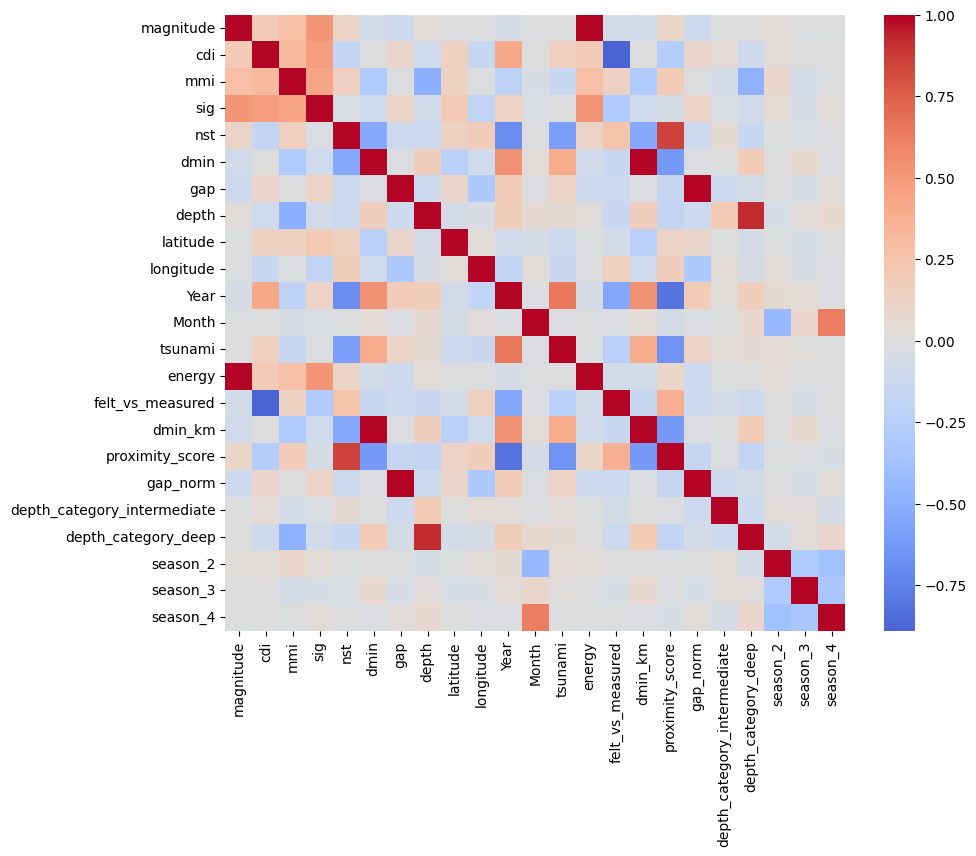

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(et_data.corr(), cmap='coolwarm', center=0)
plt.show()


### **Modelling Time**

In [5]:
X = et_data.drop(columns=['tsunami'])
y = et_data['tsunami']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.86      0.91        91
           1       0.83      0.95      0.89        66

    accuracy                           0.90       157
   macro avg       0.90      0.91      0.90       157
weighted avg       0.91      0.90      0.90       157



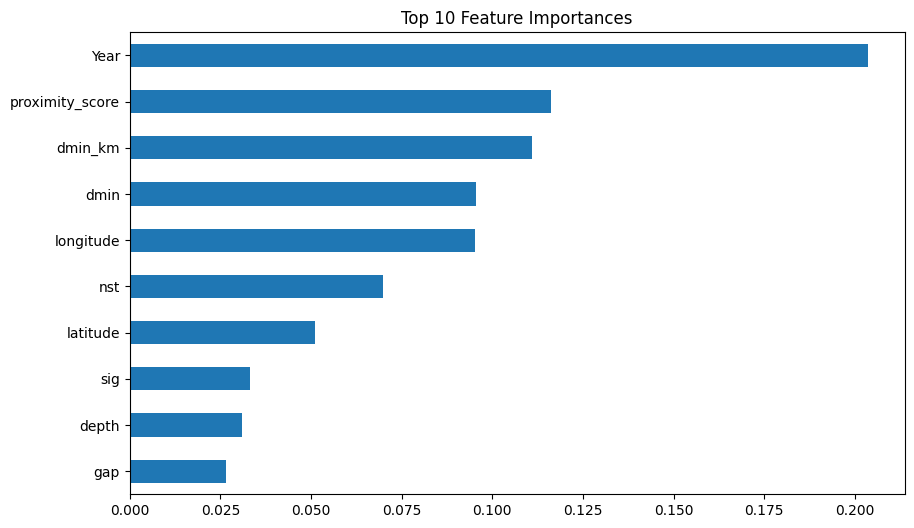

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
importances.sort_values(ascending=True).tail(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

_Unfortunately the fact that year of occurrence is the most important feature goes to show how global warming has affected the probability of tsunami's_

### **Categorical analyser**

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        91
           1       0.83      0.95      0.89        66

    accuracy                           0.90       157
   macro avg       0.90      0.91      0.90       157
weighted avg       0.91      0.90      0.90       157



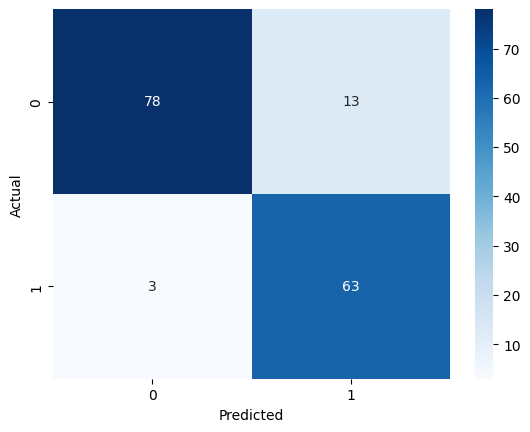

In [11]:
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Testing the model**

In [ ]:
new_data = pd.DataFrame([{
    'magnitude': 7.2,
    'cdi': 5,
    'mmi': 6,
    'sig': 700,
    'nst': 120,
    'dmin': 0.3,
    'gap': 100,
    'depth': 50,
    'latitude': 38.322,
    'longitude': 142.369,
    'Year': 2024,
    'Month': 3,
    'energy': 7.2**2,
    'felt_vs_measured': 6 - 5,
    'dmin_km': 0.3 * 111,
    'proximity_score': 1 / (0.3*111 + 1),
    'gap_norm': 100 / 360,
    'depth_category_intermediate': 0,
    'depth_category_deep': 0,
    'season_2': 0,
    'season_3': 1,
    'season_4': 0
}])

new_data = new_data.reindex(columns=X.columns, fill_value=0)
new_data_scaled = scaler.transform(new_data)

pred = model.predict(new_data_scaled)[0]
print("Tsunami likely!" if pred == 1 else "No tsunami expected.")

Tsunami likely!
